# Homework 4

* Due 11/28 23:59 pm est
* Following instructions provided in **Homework submission instructions**

# Problem 1 (50 pts)

The file "Game_of_Thrones_Script.csv" contains line script for characters across 8 seasons. Use this file, answer the following question.

## part (a) - 5 pts

How many characters are there across all 8 seasons?

## part (b) - 5 pts

How many characters are there in each season?

**Note:** These numbers do not have to add to the number you get in part (a).

## part (c) - 5 pts

Which episode has the least number of characters?

In [1]:
import pandas as pd
GOT = pd.read_csv("Game_of_Thrones_Script.csv")
GOT.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011/4/17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011/4/17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011/4/17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


## part (d) - 5 pts

which episode has the most line of sentences in total?

## part (e) - 5 pts


Across all 8 seasons, list the top 5 charaters who had the most sentences and how many sentences they have said.

## part (f) - 5 pts

Create a bar plot using the result from part (b). 

**Note**: You can plot either a regular bar plot or a horizontal bar plot.
* For regular bar plot, the x-axis will be season number and the y axis will be the number of characters.
* For horizontal bar plot, the x-axis will be the number of characters  and the y-axis will be season number.

## part (g) - 5 pts

Based on the **Sentence** column, create a new column called **num_words** which gives the total number of words in the sentence.

## part (h) - 5 pts

For numeric variables, we can use some quantities to summarize. For this part, first split the data based on season. Then, for variable **num_words**, calculate 
* minimum
* 1st quartile
* mean
* median
* 3rd quartile
* maximum
* summation

What can you tell based on your results?

## part (i) - 5 pts

Use ```catplot``` method in seaborn package, make boxplots of **num_words** for each season.

## part (j) - 5 pts

Using ```Facegrid``` method from seaborn library, create histograms of **num_words** for different seasons.

**Note**: For better presentation, you can use argument **col_wrap** in ```FaceGrid``` method.

# Problem 2  (30 pts)

For this problem, you are given 3 data files

* purchases: contains purchases record March 2019 - June 2019.
* customers: contains information about customers.
* products: contains information about products.

First, import all 3 data files. 

**Note**: When importing customers.csv and products.csv, you may want to set ```index_col="customer_id"``` and ```index_col="product_id"```.

## part (a) - 10 pts

Using purchases as the left table, use left join to join **purchases** and **customers** together. In this case, since both tables contain column **customer_id**, so this column can be used as key for the joining. To do this, you need to set ```on="customer_id``` in the ```join``` method. Name this joined table as **purchase1**.

Using DataFrame **purchases1**, make a barplot that shows the frequency of purchases for different gender group. Which gender group has higher frequency?

## part (b) - 10 pts

Using purchases1 as the left table, use left join to join **purchases1** and **product** together. In this case, since both tables contain column **product_id**, so this column can be used as key for the joining. To do this, you need to set ```on="product_id``` in the ```join``` method. Name this joined table as **purchase2**.

Using **purchase2**, list the top 5 best selling products (based on the **amount** sold).

## part (c) -10 pts

Repeat part b for each gender group: What are the top 5 best selling products for male and female group?

**Note**: One possible way to do this is to first create two new DataFrames for each gender. Then repeat what you did in part b.

# Problem 3 (20 pts)

The file "Kobe_data.csv" contains shot records of NBA basketball player Kobe Bryant for his career. Below, is a function that plot all the shots made by Kobe. The graph is just to illustrate the flexibility of matplotlib.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
kobe = pd.read_csv('kobe_data.csv')
def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(470, 0)
    

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


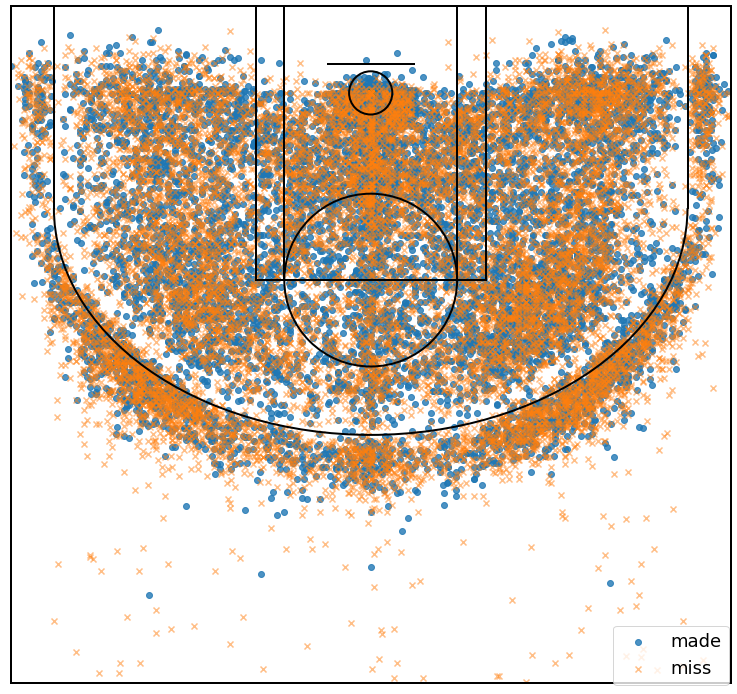

In [2]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(10, 9.4))
ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(kobe[kobe.shot_made_flag == 1]['loc_x'], kobe[kobe.shot_made_flag == 1]['loc_y'] + 60, alpha = 0.8, label = 'made')
plt.scatter(kobe[kobe.shot_made_flag == 0]['loc_x'], kobe[kobe.shot_made_flag == 0]['loc_y'] + 60, marker='x', alpha=0.5, label = 'miss')
ax = create_court(ax, 'black')
fig.legend(loc = 'lower right')

## Part (a) - 10 pts

Create a **relative** frequency table using **combined_shot_type** and **shot_zone_range** and set ```margins=True```. 

## part (b) - 5 pts

As we talked during the class, this relative frequency table give the empirical probabilities associated with different categories. Based on the table, what is kobe's most commonly used shoting type?

## part (c) - 5 pts

Given a shot is made less than 8ft, what is kobe's most commonly used shoting type? What is the expirical conditional probability here? 

**Hint**:

Conditional probability of A given B can be calculated by:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$